Acknowledgement: Lab materials on PyTorch are developed on Software Lab 1 of MIT [Introduction to Deep Learning](http://introtodeeplearning.com).

## Install PyTorch

[PyTorch](https://pytorch.org/) is a popular deep learning library known for its flexibility and ease of use.

Let's start by installing PyTorch. There are a few options to install and run PyTorch.

Option 1: Install and run PyTorch locally. Depending on operating system (OS), Python version and availability of cuda-enabled GPUs, you can find the install command on https://pytorch.org/get-started/locally/ and install using `pip`.

For example, on Windows OS with CPU only, the install command is:

In [ ]:
pip3 install torch torchvision torchaudio

Option 2: Use Google Colab

Another option for accessing free GPUs is by using Google Colab, which is an alternative to installing Python on your own computer.

https://colab.research.google.com/

In [ ]:
# !pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

You can verify if PyTorch is installed successfully by running:

In [ ]:
import torch

print(torch.__version__) # Check version

2.5.1+cu124


If it is successful, continue to load a couple of dependencies which will be useful for this lab.

In [ ]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## What is PyTorch?

PyTorch is a machine learning library. At its core, PyTorch provides an interface for creating and manipulating [tensors](https://pytorch.org/docs/stable/tensors.html). A tensor is a multi-dimensional array where the number of dimensions is known as its
rank.

* A rank-0 tensor is just a single number, or a scalar
* A rank-1 tensor is also called a vector
* A rank-2 tensor is also called a matrix

PyTorch provides the ability to perform computation on these tensors, define neural networks, and train them efficiently.

The [```shape```](https://pytorch.org/docs/stable/generated/torch.Tensor.shape.html#torch.Tensor.shape) of a PyTorch tensor defines its number of dimensions and the size of each dimension. The `ndim` or [```dim```](https://pytorch.org/docs/stable/generated/torch.Tensor.dim.html#torch.Tensor.dim) of a PyTorch tensor provides the number of dimensions (n-dimensions), and you can also think of this as the tensor's order or degree.

Let's start by creating some tensors and inspecting their properties:


In [ ]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


Vectors and lists can be used to create 1-d tensors:

In [ ]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


Next, let’s create 2-d (i.e., matrices) and higher-rank tensors. In image processing and computer vision, we will use 4-d Tensors with dimensions corresponding to batch size, number of color channels, image height, and image width.

In [ ]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = # TODO

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = # TODO

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

In [ ]:
matrix = torch.tensor([[1, 1, 1], [2,2,2]])

images = torch.tensor(torch.zeros(10,3,256,256))

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


<ipython-input-19-f13cff85a59f>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(torch.zeros(10,3,256,256))


As you have seen, the `shape` of a tensor provides the number of elements in each tensor dimension. The `shape` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank tensor:

In [ ]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([2, 2, 2])
`column_vector`: tensor([1, 2])
`scalar`: 1


## Basic computations on Tensors

Next we'll do some calculations. First, we'll create two tensors that have a constant value then add them together.

In [ ]:
a = torch.tensor(15)
b = torch.tensor(61)

# add the two constants together and print
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 76
c2: 76


We can repeat this exercise with rank-2 tensors now and also explore some other computations.

In [ ]:
# create constant tensors
a = torch.tensor([[1, 2, 3],[4, 5, 6]])
b = torch.tensor([[6, 5, 4],[3, 2, 1]])

# add them together and print
c1 = torch.add(a, b)
print(f"c1: {c1}")

# elementwise multiplication
c2 = torch.multiply(a, b)
print(f"c2: {c2}")

c1: tensor([[7, 7, 7],
        [7, 7, 7]])
c2: tensor([[ 6, 10, 12],
        [12, 10,  6]])


## Neural networks in PyTorch
We can also define neural networks in PyTorch. PyTorch uses [``torch.nn.Module``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html), which serves as a base class for all neural network modules in PyTorch and thus provides a framework for building and training neural networks.

Let's consider the example of a simple perceptron defined by just one dense (aka fully-connected or linear) layer: $ y = \sigma(Wx + b) $, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output.

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph-2.png)

In PyTorch, we define layers using `torch.nn.Module`, which provides a way to create and organise the building blocks of a neural network. To create a custom layer, we define a new class that is based on `nn.Module`. Inside this class, we specify the layer's parameters as attributes and implement a function called [``forward``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward). The `forward` function defines how the input data is processed by this layer during the forward pass.

Every time we create a new type of layer, we need to define what happens to the input in the `forward` function. This ensures that our layer performs the correct computation at each step of training or inference.

Let's write a dense layer class to implement a perceptron defined above.

In [ ]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialise parameters: a weight matrix W and bias b
        # Note that the parameter initialise is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = # TODO

        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = # TODO
        return y

In [ ]:
class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        z = torch.matmul(x, self.W) + self.bias
        y = torch.sigmoid(z)
        return y

Now, let's test the output of our layer.

In [ ]:
# Define a layer and test the output
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.6199, 0.1243, 0.3665]], grad_fn=<SigmoidBackward0>)


Conveniently, PyTorch has defined a number of ```nn.Modules``` (or Layers) that are commonly used in neural networks, for example a [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) or [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) module.

Now, instead of using a single ```Module``` to define our simple neural network, we'll use the  [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module from PyTorch and a single [`nn.Linear` ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks.

In [ ]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z'''
model = nn.Sequential( ''' TODO ''' )

'TODO: Use the Sequential API to define a neural network with a\n    single linear (dense!) layer, followed by non-linearity to compute z'

In [ ]:
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes),
    nn.Sigmoid()
)

We've defined our model using the Sequential API. Now, we can test it out using an example input:

In [ ]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.6199, 0.1243, 0.3665]], grad_fn=<SigmoidBackward0>)


With PyTorch, we can create more flexible models by building on [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) (technically, it is known as subclass `nn.Module`, inheriting the properties and behaviors of the base class, i.e. `nn.Module` in this case). The `nn.Module` class allows us to group layers together flexibly to define new architectures.

As we saw earlier with `OurDenseLayer`, we can subclass `nn.Module` to create a class for our model. Inside this class, we define the layers we need and specify how data moves through them using the `forward` function. This approach gives us the flexibility to create custom layers, custom training loops, custom activation functions, and entirely new model architectures. Let's define the same neural network model as above (i.e., Linear layer with an activation function after it), now using a class-based approach and PyTorch's built-in linear layer from `nn.Linear`.

In [ ]:
### Defining a model using subclassing ###

class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        '''TODO: define a model with a single Linear layer and sigmoid activation.'''
        self.linear = '''TODO: linear layer'''
        self.activation = '''TODO: sigmoid activation'''

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output

In [ ]:
class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output

Let's test out our new model, using an example input, setting `n_input_nodes=2` and `n_output_nodes=3` as before.

In [ ]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.3105, 0.4519, 0.1687]], grad_fn=<SigmoidBackward0>)


## Automatic Differentiation in PyTorch

In PyTorch, [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) is used for [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation), which is critical for training deep learning models with [backpropagation](https://en.wikipedia.org/wiki/Backpropagation).

We will use the PyTorch [`.backward()`](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) method to trace operations for computing gradients. On a tensor, the [`requires_grad`](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html) attribute controls whether autograd should record operations on that tensor. When a forward pass is made through the network, PyTorch records all the operations that occur; then, to compute the gradient, the `backward()` method is called to perform backpropagation.

Let's compute the gradient of $ y = x^2 $:

In [ ]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimise a loss function. Now that we have a sense of how PyTorch's autograd can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $ L=(x-x_f)^2 $. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ($ x_{min}=x_f $), considering how we can compute this using PyTorch's autograd sets us up nicely for future activities where we use gradient descent to optimise entire neural network losses.

In [ ]:
### Function minimization with autograd and gradient descent ###

# Initialize a random value for our intial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value


# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.
for i in range(500):
    x = torch.tensor([x], requires_grad=True)

    # TODO: Compute the loss as the square of the difference between x and x_f
    loss = # TODO

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

Initializing x=0.027529221028089523


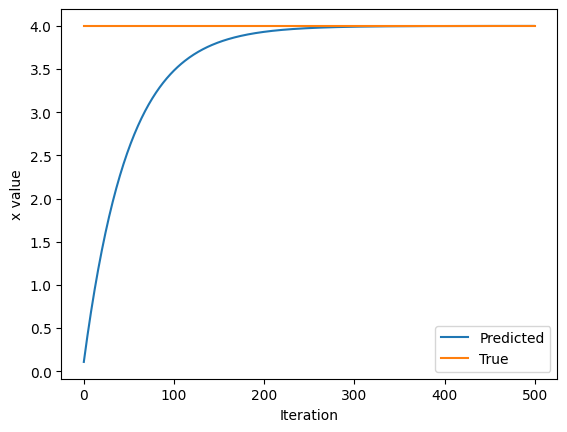

In [ ]:
# Initialize a random value for our intial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value

for i in range(500):
    x = torch.tensor([x], requires_grad=True)

    # Compute the loss as the square of the difference between x and x_f
    loss = (x-x_f) ** 2

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

Now, we have covered the fundamental concepts of PyTorch -- tensors, operations, neural networks, and automatic differentiation.


# Dividend

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch.optim as optim

In [ ]:
dividend = pd.read_csv("dividendinfo.csv")
dividend.iloc[:,1:6] = dividend.iloc[:,1:6].astype(np.float64)

<ipython-input-6-462ad0a61f48>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      545.0
1      630.0
2      562.0
3      388.0
4      684.0
       ...  
195    404.0
196    760.0
197    236.0
198    387.0
199    652.0
Name: mcap, Length: 200, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dividend.iloc[:,1:6] = dividend.iloc[:,1:6].astype(np.float64)


In [ ]:
np.random.seed(1)

# Data split
idx = np.random.choice(dividend.index, size=int(0.8 * len(dividend)), replace=False)
train = dividend.loc[idx]
test = dividend.drop(idx)

In [ ]:
# Option 1: Standardise the data
scaler = StandardScaler()
train_std = train.copy()
train_std.iloc[:, 1:6] = scaler.fit_transform(train.iloc[:, 1:6]) # Fit on the training data and transform it
test_std = test.copy()
test_std.iloc[:, 1:6] = scaler.transform(test.iloc[:, 1:6]) # Use the training data's parameters to standardise the test data

# Option 2: Normalise the data
scaler_norm = MinMaxScaler()
train_norm = train.copy()
train_norm.iloc[:, 1:6] = scaler_norm.fit_transform(train.iloc[:, 1:6])
test_norm = test.copy()
test_norm.iloc[:, 1:6] = scaler_norm.transform(test.iloc[:, 1:6])

In [ ]:
model = nn.Sequential(
    nn.Linear(5, 5),
    nn.Sigmoid(),
    nn.Linear(5,1),
    nn.Sigmoid()
)

In [ ]:
class SingleLayer(nn.Module):
    def __init__(self):
        super(SingleLayer, self).__init__()
        self.linear = nn.Linear(X_tensor.shape[1], 5)
        self.activation = nn.Sigmoid()
        self.classifier = nn.Linear(5, 1) # 5 hidden units -> 1 output (for binary classification)

    def forward(self, inputs):
        x = self.linear(inputs) # pass through hidden layer
        x = self.activation(x) # apply sigmoid activation
        x = self.classifier(x) # output layer
        x = self.activation(x)  # apply sigmoid to output
        return x

model = SingleLayer()

In [ ]:
# Convert from dataframe to tensor
X_tensor = torch.tensor(train_std.iloc[:, 1:6].values, dtype=torch.float32)
y_tensor = torch.tensor(train_std.iloc[:, 0].values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(test_std.iloc[:, 1:6].values, dtype=torch.float32)
y_test_tensor = torch.tensor(test_std.iloc[:, 0].values, dtype=torch.float32).view(-1,1)

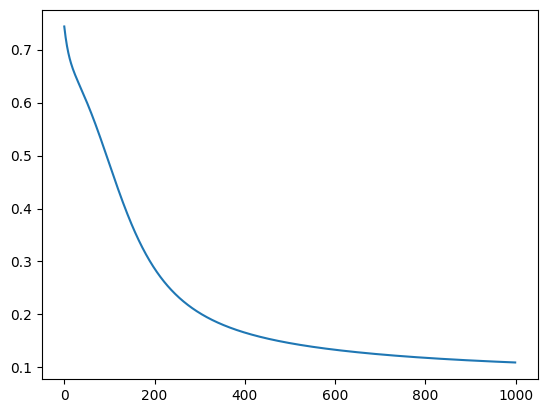

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 1000
history = []

for epoch in range(num_epochs):

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    y = model(X_tensor)

    # Compute the loss between the predictions and the targets
    loss = criterion(y, y_tensor)

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    optimizer.step()

    history.append(loss.item())

plt.plot(history)
plt.show()

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation during prediction
    y_pred = model(X_tensor)
    y_test_pred = model(X_test_tensor)
y_pred_binary = (y_pred >= 0.5).float()  # Threshold at 0.5 to get binary predictions
y_test_pred_binary = (y_test_pred >= 0.5).float()  # Threshold at 0.5 to get binary predictions

# Calculate accuracy
correct_predictions = (y_pred_binary == y_tensor)
train_accuracy = correct_predictions.sum().item() / y_tensor.shape[0]  # Training accuracy
correct_predictions = (y_test_pred_binary == y_test_tensor)
test_accuracy = correct_predictions.sum().item() / y_test_tensor.shape[0]  # Training accuracy

print(f'Training accuracy: {train_accuracy * 100:.2f}%, Test accuracy: {test_accuracy * 100:.2f}%')

Training accuracy: 96.25%, Test accuracy: 92.50%
